# Lec 02: Probability and Linear Regression

Today:
1. Review
2. Probability Mass Function
3. Expectation
4. Joint distribution
5. Bayes rule / independence
6. Cumulative distribution function / Towards Continuous Distriubtions
7. Probability Density Function
8. Normal Distribution
9. Revisiting Linear Regression

## Review: Last time we looked at Linear Algebra and Linear Regression

### Problem

Given points, how do we draw a line that is the best fit to those points?

Text(0.5, 1.0, 'Example dataset')

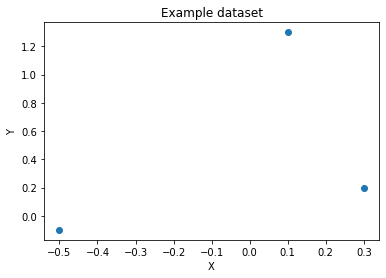

In [53]:
x1 = [0.3]                     # each point has dimension 1
x2 = [-0.5]               
x3 = [.1]                
Y = [0.2, -.1, 1.3]
X = np.array([x1, x2, x3])   # each row is one point

plt.plot(X[:,0], Y, marker='o', linestyle='none')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Example dataset')

### Method

Solve
$$ 
(X^TX)x = X^TY
$$
for x where
$X$ is the matrix of inputs and $Y$ is the vector of outputs.

1. A vector is an element of a vector space. An important example of a vector space is $\mathbb{R}^D$.
2. A matrix encodes a linear map.
3. The equation above can be solved with gaussian elimination which is implemented in many numeric linear algebra packages.

In [52]:
def linear_algebra_solve(X, Y):
    X_p = np.concatenate([X, np.ones((3, 1))], axis=1)
    return np.linalg.solve(X_p.transpose() @ X_p, X_p.transpose() @ Y)

linear_algebra_solve(X, Y)

array([0.82692308, 0.49423077])

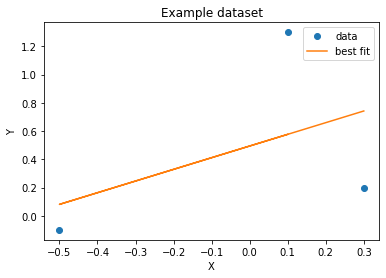

In [58]:
x1 = [0.3]                     # each point has dimension 1
x2 = [-0.5]               
x3 = [.1]                
Y = [0.2, -.1, 1.3]
X = np.array([x1, x2, x3])   # each row is one point

plt.plot(X[:,0], Y, marker='o', linestyle='none', label='data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Example dataset')

# Plot solution
weights = linear_algebra_solve(X, Y)
predictions = [weights[0] * x + weights[1] for x in X]
plt.plot(X[:,0], predictions, label='best fit')
plt.legend()

# Probability

1. We'll now turn towards reviewing probability.
2. Probability will give us another view of linear regression.
3. Probability is used extensively in machine learning.

## Example: Fair Coin

1. Imagine you're flipping a coin.
2. The outcome of this coin can either be heads (H) or tails (T).
3. In other words, there is uncertainty in the outcome.
4. Nevertheless, we can quantify this uncertainty by using the language of probability to say that both outcomes are equally likely.

### Discrete Probability = Desired Outcome / Total Outcomes

1. How many outcomes are possible? 2, i.e., H or T
2.
$$
\text{desired probability} = \frac{\text{desired outcome}}{\text{total outcomes}}
$$

\begin{align*}
Pr(X = H) & = 0.5 \tag{The probability of H is 1/2} \\
Pr(X = T) & = 0.5 \tag{The probability of T is 1/2}
\end{align*}

1. X is a **random variable** that takes on values in $\{H, T\}$.
2. The sum of probabilities of all outcomes should add to 1.
3. The probability of disjoint sets of values is additive, e.g., $Pr(X \in \{H, T\}) = Pr(X \in \{H\}) + Pr(X \in \{T\})$

## Example: Dice Roll

\begin{align*}
Pr(X = 1) & = 1/6 \\
Pr(X = 2) & = 1/6 \\
Pr(X = 3) & = 1/6 \\
Pr(X = 4) & = 1/6 \\
Pr(X = 5) & = 1/6 \\
Pr(X = 6) & = 1/6 
\end{align*}

1. X is a **random variable** that takes on values in $\{1, 2, 3, 4, 5, 6\}$.
2. The sum of probabilities of all outcomes should add to 1.
3. The probability of disjoint sets of values is additive, e.g., $Pr(X \mbox{ is odd}) = Pr(X = 1) + Pr(X = 3) + Pr(X = 5)$

## Discrete Random Variable

1. A **discrete random variable** $X$ takes on values in some set $\mathcal{X} = \{x_1, x_2, \dots\}$.
2. The probabilities sum to one 
$$
\sum_{x \in \mathcal{X}} Pr(X = x) = 1
$$
3. The function $p(x) = Pr(X = x)$ is called a **probability mass function**.

## Distribution of Discrete Random Variable

1. A **discrete probability distribution** is determined by a probability mass function.
2. We notate that a discrete random variable is drawn from a distribution with probability mass function $p$ as
\begin{align*}
X \sim p(x)
\end{align*}

## Bernoulli Distribution

A **Bernoulli distribution**
$$
Bern(\theta)
$$
is a discrete probability distribution such that
\begin{align*}
Pr(X = 0) = \theta \\
Pr(X = 1) = 1 - \theta
\end{align*}

## Example: Fair Coin Flip

We write that X takes on the value of a fair coin flip as
$$
X \sim Bern(0.5)
$$

## Categorical Distribution

A **Categorical distribution**
$$
Cat([\pi_1, \dots, \pi_D])
$$
is a discrete probability distribution such that
$$
Pr(X = i) = \pi_i
$$
for $1 \leq i \leq D$.

## Example: Dice Roll

We write that X takes on the value of a dice roll as
$$
X \sim Cat([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
$$

\begin{align*}
Pr(X = 1) & = 1/6 \\
Pr(X = 2) & = 1/6 \\
Pr(X = 3) & = 1/6 \\
Pr(X = 4) & = 1/6 \\
Pr(X = 5) & = 1/6 \\
Pr(X = 6) & = 1/6
\end{align*}

## Let's make this Computational

In [1]:
import numpy as np
import scipy as sp   # scipy is a popular scientific computing library for Python
import scipy.stats   # statistics package

### Create a Bernoulli distribution

In [2]:
bern = sp.stats.bernoulli(0.5)
bern

### Random variable with Bernoulli distribution

$$
X \sim Bern(0.5)
$$

In [3]:
# X is a program variable that is bound to a sample drawn from a Bernoulli distribution
X = bern.rvs()
X # run this a few times, it's a random variable 

0

### Aside: Histogram

1. A random variable takes on a value with a certain probability
2. We can display this in a **histogram**

(array([47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 53.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

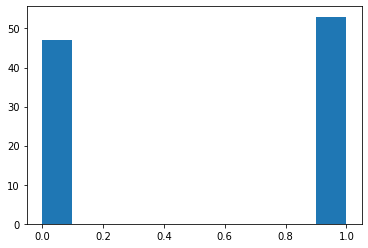

In [4]:
import matplotlib.pyplot as plt
Xs = bern.rvs(size=100) # draw 100 samples
plt.hist(Xs)

### Probability Mass Function

\begin{align*}
Pr(X = 0) & = 0.5 \\
Pr(X = 1) & = 0.5 \\
\end{align*}

In [5]:
# probability mass function of 0
bern.pmf(0)

0.5

In [6]:
# probability mass function of 1
bern.pmf(1)

0.5

### Create a Categorical Distribution

$$
Cat([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
$$

In [7]:
cat = sp.stats.rv_discrete(values=([1, 2, 3, 4, 5, 6], [1./6., 1./6., 1./6., 1./6., 1./6., 1./6.]))
cat

### Random Variable with Categorical Distribution

$$
X \sim Cat([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
$$

In [8]:
cat.rvs() # run several times

5

(array([14., 23., 12., 18., 16., 17.]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <BarContainer object of 6 artists>)

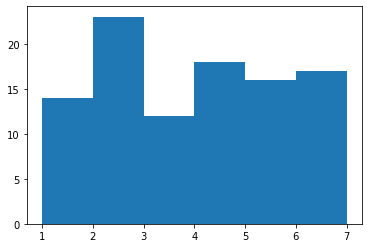

In [9]:
Xs = cat.rvs(size=100) # draw 100 samples
plt.hist(Xs, bins=[1,2,3,4,5,6,7])

In [10]:
# probability mass function
cat.pmf(1), cat.pmf(2), cat.pmf(3), cat.pmf(4), cat.pmf(5), cat.pmf(6)

(0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666)

## Expectation of Discrete Random Variable

1. We will now introduce language for talking about the value of a random variable "on average".
2. The formal concept is called **expectation**.

### Expectation Formally

$$
\mathbb{E} X = \sum_{x \in \mathcal{X}} x Pr(X = x)
$$

The set of values that $X$ can take on with non-zero probability is the **support** of X.

### Example 1: Fair Coin

\begin{align*}
X & \sim Bern(0.5) \\
\mathbb{E} X  & = 0 \cdot 0.5 + 1 \cdot 0.5 = 0.5
\end{align*}

The support of X is $\{ 0, 1 \}$.

### Example 2: Biased Coin

\begin{align*}
X & \sim Bern(0.7) \\
\mathbb{E} X  & = 0 \cdot 0.7 + 1 \cdot 0.3 = 0.3
\end{align*}

The support of X is $\{0, 1 \}$.

### Example 3: Dice Roll

\begin{align*}
X & \sim Cat([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]) \\
\mathbb{E} X  & = 1 \cdot 1/6 + 2 \cdot 1/6 + 3 \cdot 1/6 + 4 \cdot 1/6 + 5 \cdot 1/6 + 6 \cdot 1/6 = 21/6
\end{align*}

The support of $X$ is $\{ 1, 2, 3, 4, 5, 6 \}$

### Fair Coin: Computational 

In [11]:
bern = sp.stats.bernoulli(0.5)
bern.support()

(0, 1)

In [12]:
def expectation(dist):
    tmp = 0
    for v in dist.support():    # loop over support
        tmp += v * dist.pmf(v)  # add up value times the probability
    return tmp

expectation(bern)

0.5

In [13]:
# This is a common operation that we have a built-in method for computing expectation
bern.expect()

0.5

### Biased Coin Again: Computational 

In [14]:
biased_bern = sp.stats.bernoulli(0.7)
print("Support", biased_bern.support())
print("Expectation", biased_bern.expect())

Support (0, 1)
Expectation 0.7


### Categorical Again: Computational

In [15]:
cat = sp.stats.rv_discrete(values=([1, 2, 3, 4, 5, 6], [1./6., 1./6., 1./6., 1./6., 1./6., 1./6.]))
print("Support", cat.support())
print("Expectation", cat.expect())

Support (1, 6)
Expectation 3.5


## Multiple Random Variables?

1. So far, we've only worked with 1 random variable.
2. What happens if we have more than 1 random variable?
3. We'll have to introduce more interesting concepts such as **joint distributions**, **independence**, and **conditional independence**.

## Joint Distributions

### Example: Two Fair Coins

1. Suppose we flip two fair coins.
2. How do we extend our notion of discrete distribution to encompass the distribution of outcomes across both fair coins?
3. This is what is known as a **joint distribution**.

### Revisiting Discrete Probability = Desired Outcome / Total Outcomes

1. Total outcomes = 4:
    - HH (first coin is heads, second coin is heads)
    - HT (first coin is heads, second coin is tails)
    - TH (first coin is tails, second coin is heads)
    - TT (first coin is tails, second coin is tails)
2. Thus the joint probability of any outcome is $1/4 = 0.25$.

### Wait: Why not?

1. There is an alternative way of counting where total outcomes = 3:
    - HH (both heads)
    - HT (1 head and 1 tails)
    - TT (both tails)
2. Thus the joint probability of any outcome is $1/3 = 0.33$.

There are two ways to get 1 head and 1 tails. 

### Joint Distribution with 2 Fair Coins

\begin{align*}
Pr(X = H, Y = H) & = 0.25 \tag{first heads, second heads} \\
Pr(X = H, Y = T) & = 0.25 \tag{first heads, second tails} \\
Pr(X = T, Y = H) & = 0.25 \tag{first tails, second heads} \\
Pr(X = T, Y = T) & = 0.25 \tag{first tails, second tails}
\end{align*}

Let's define a \texttt{TwoBern} distribution to have the PMF above.

### Joint Distribution as a Table

|        | X = H  | X = T |
| ------ | ------ | ----- |
| Y = H  | 0.25   | 0.25  |
| Y = T  | 0.25   | 0.25  |

### Random Vector Notation

$$
\begin{pmatrix}
X \\
Y
\end{pmatrix} \sim TwoBern()
$$

We now have a **random vector**, a vector of random variables!
1. The first component is the random variable $X$.
2. The second component is the random variable $Y$.
3. This concept of vector is the same one from linear algebra.
4. The entire vector comes from the joint distribution TwoBern.

## Marginal Distribution

1. How is a joint distribution related to a univariate, i.e., single variable distribution?
2. This is where the idea of a **marginal distribution** comes in.

The **marginal distribution** of $X$ is obtained by summing out over all possibilities of $Y$
$$
Pr(X = x) = \sum_{y \in \mathcal{Y}} Pr(X = x, Y = y) \,.
$$

#### Marginal Distribution of X as Table

Take joint distribution

|        | X = H  | X = T |
| ------ | ------ | ----- |
| Y = H  | 0.25   | 0.25  |
| Y = T  | 0.25   | 0.25  |

and sum vertically

|        | X = H or X = T  |
| ------ | ------ |
| Y = H  | 0.5   |
| Y = T  | 0.5   |

Similarly, the **marginal distribution** of $Y$ is obtained by summing out over all possibilities of $X$
$$
Pr(Y = y) = \sum_{x \in \mathcal{X}} Pr(X = x, Y = y) \,.
$$

#### Marginal Distribution of Y as Table

Take join distribution

|        | X = H  | X = T |
| ------ | ------ | ----- |
| Y = H  | 0.25   | 0.25  |
| Y = T  | 0.25   | 0.25  |

and sum horizontally

|        | X = H  | X = T |
| ------ | ------ | ----- |
| Y = H or Y = T  | 0.5   | 0.5  |


### Computatationally

In [16]:
numToHT = {
    0: '00',  # encodes the random vector (0 0)
    1: '01',  # encodes the random vector (0 1)
    2: '10',  # encodes the random vector (1 0)
    3: '11',  # encodes the random vector (1 1)
}
twobern = sp.stats.rv_discrete(values=([0, 1, 2, 3], [1/4., 1/4., 1/4., 1/4.]))
numToHT[twobern.rvs()]

'10'

(array([25.,  0.,  0., 19.,  0.,  0., 26.,  0.,  0., 30.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

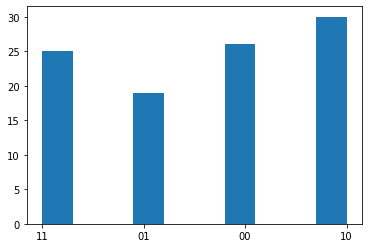

In [17]:
tmp = []
for i in range(0, 100):
    X = twobern.rvs()
    tmp += [numToHT[X]]
plt.hist(tmp)

In [18]:
# marginal of Pr(X = 0)
twobern.pmf(0) + twobern.pmf(1)

0.5

In [19]:
# marginal of Pr(X = 1)
twobern.pmf(2) + twobern.pmf(3)

0.5

In [20]:
# marginal of Pr(Y = 0)
twobern.pmf(0) + twobern.pmf(2)

0.5

In [21]:
# marginal of Pr(Y = 1)
twobern.pmf(1) + twobern.pmf(3)

0.5

### How are Marginals related Joint Distributions?

1. Can we build the joint distribution from univariate distributions?
2. In particular, we may have noticed that the marginals are exactly the Bern(0.5) distribution.
3. In answering these questions, we'll need the concepts of **independence** and **conditional independence**.

## Independence

1. Two random variables $X$ and $Y$ are said to be **independent** if $Pr(X = x, Y = y) = Pr(X = x) Pr(Y = y)$.
2. In other words, two random variables are independent if their joint distribution factorizes into a product of their marginal distributions.

### Are variables drawn from TwoBern independent?

\begin{align*}
Pr(X = H, Y = H) & = 0.25 = 0.5 \cdot 0.5 = Pr(X = H) Pr(Y = H) \\
Pr(X = H, Y = T) & = 0.25 = 0.5 \cdot 0.5 = Pr(X = H) Pr(Y = T) \\
Pr(X = T, Y = H) & = 0.25 = 0.5 \cdot 0.5 = Pr(X = T) Pr(Y = H) \\
Pr(X = T, Y = T) & = 0.25 = 0.5 \cdot 0.5 = Pr(X = T) Pr(Y = T)
\end{align*}

So yes we have **independent** variables.

In this case, we can notate the random vector $(X \,\, Y)^T$ as being drawn as below
\begin{align*}
X \sim Bern(0.5) \\
Y \sim Bern(0.5)
\end{align*}

Intuitively, this means that sampling from $X$ is not affected by sampling from $Y$, and vice versa.

### Building an Independent Joint Distribution

(array([33.,  0.,  0., 26.,  0.,  0., 20.,  0.,  0., 21.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

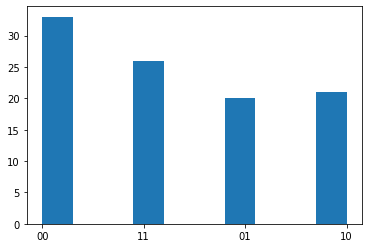

In [22]:
bern = sp.stats.bernoulli(0.5)
tmp = []
for i in range(0, 100):
    X = bern.rvs()
    Y = bern.rvs()
    tmp += [f"{X}{Y}"]
plt.hist(tmp)

### Example: Non-Independent Joint Distribution

#### Joint distribution

\begin{align*}
Pr(X = H, Y = H) & = 0.083 \\
Pr(X = H, Y = T) & = 0.4167 \\
Pr(X = T, Y = H) & = 0.4167 \\
Pr(X = T, Y = T) & = 0.083 \\
\end{align*}

#### Marginal distribution of X

\begin{align*}
Pr(X = H) & = 0.083 + 0.4167 = 0.5 \\
Pr(X = T) & = 0.4167 + 0.083 = 0.5 \\
\end{align*}

#### Marginal distribution of Y

\begin{align*}
Pr(Y = H) & = 0.4167 + 0.083 = 0.5 \\
Pr(Y = T) & = 0.083 + 0.4167 = 0.5 \\
\end{align*}

#### Not independent!

Every combination of $Pr(X = x) Pr(Y = y) = 0.25$ which is not equal to the joint distribution

### Question: How would a non-independent joint distribution arise?

## Conditional Distributions, Bayes Rule, and Conditional Independence

### Conditional Distributions

A **conditional distribution** is notated
$$
Pr(X = x | Y = y)
$$
and gives the distribution of $X$ for a fixed value of $Y$.

### Example: Two Coin Flips

1. Let's say that we flipped a coin $Y$.
2. We can define a conditional distribution of $X$ given $Y$ is heads.

\begin{align*}
Pr(X = H | Y = H) & = 0.4 \\
Pr(X = T | Y = H) & = 0.6
\end{align*}

(array([584.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 416.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

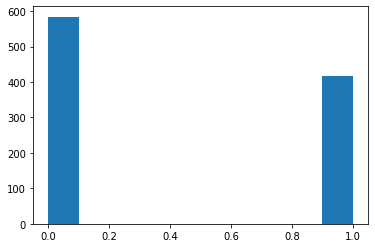

In [23]:
bern_given_yheads = sp.stats.bernoulli(0.4)
Xs = bern_given_yheads.rvs(size=1000) # draw 100 samples
plt.hist(Xs)

### Example: Two Coin Flips Continued

1. Similarly we can define a conditional distribution of $X$ given $Y$ is tails.

\begin{align*}
Pr(X = H | Y = H) & = 0.6 \\
Pr(X = T | Y = H) & = 0.4
\end{align*}

2. Note that this is conditional because depending on the value of Y, we use a different distribution for $X$.

(array([384.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 616.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

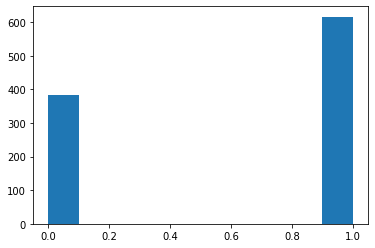

In [24]:
bern_given_ytails = sp.stats.bernoulli(0.6)
Xs = bern_given_ytails.rvs(size=1000) # draw 100 samples
plt.hist(Xs)

### Example: Two Coin Flips Continued


1. We can gather this information as two tables.

|        | X = H  | X = T |
| ------ | ------ | ----- |
| Y = H  | 0.4    | 0.6   |

|        | X = H  | X = T |
| ------ | ------ | ----- |
| Y = T  | 0.6    | 0.4   |


2. However, how do we create a joint distribution?
3. We can't simply just put the two tables together.

|        | X = H  | X = T |
| ------ | ------ | ----- |
| Y = H  | 0.4    | 0.6   |
| Y = T  | 0.6    | 0.4   |

4. This is where **Bayes Rule** comes in.

### Bayes Rule

1. Bayes rule enables us to relate conditional distributions to joint distributions.
2. It is given below.

$$
Pr(X = \cdot, Y = y) = Pr(X = \cdot | Y = y) Pr(Y = y)
$$

The notation $\cdot$ means $X$ can take on any value $x$.

### Example: Two Coin Flips Continued

|        | X = H               | X = T                 |
| ------ | ------------------- | --------------------- |
| Y = H  | 0.4 Pr(Y = H)       | 0.6 Pr(Y = H)         |
| Y = T  | 0.6 (1 - Pr(Y = H)) | 0.4 (1 - Pr(Y = H))   |

1. This definition maintains consistency with the marginals of $Y$
2. Summing horizontally, we get

|        | X = H or X = T      |
| ------ | ------------------- |
| Y = H  | Pr(Y = H)           |
| Y = T  |(1 - Pr(Y = H))      |

(array([196.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 804.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

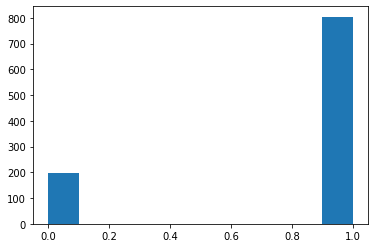

In [25]:
def joint_rvs(theta):
    bern_y = sp.stats.bernoulli(theta)
    y = bern_y.rvs()
    if y == 0:
        bern_given_yheads = sp.stats.bernoulli(0.4)
        return (bern_given_yheads.rvs(), y)
    else:
        bern_given_ytails = sp.stats.bernoulli(0.6)
        return (bern_given_ytails.rvs(), y)

Ys = []
theta = 0.8
for i in range(0, 1000):
    Ys += [joint_rvs(theta)[1]]  # Sampling Y with probability theta
# Marginal of Y
plt.hist(Ys)

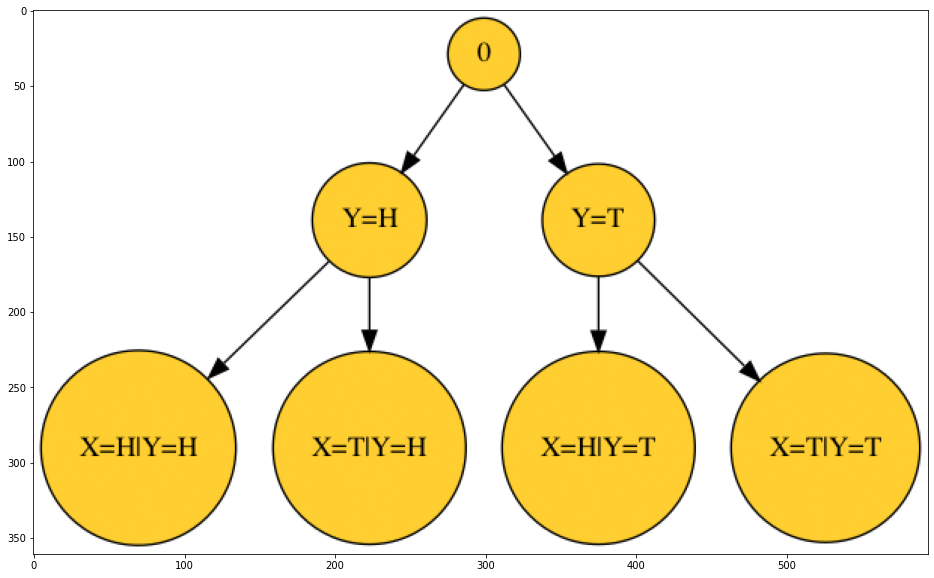

In [26]:
import dsplot
from dsplot.graph import Graph
import matplotlib.image as mpimg

graph = Graph(
    {
        0: ['Y=H', 'Y=T'],
        'Y=H': ['X=H|Y=H', 'X=T|Y=H'],
        'Y=T': ['X=H|Y=T', 'X=T|Y=T'], 'X=H|Y=H': [],
        'X=T|Y=H': [],
        'X=H|Y=T': [],
        'X=T|Y=T': []
    },
    directed=True,
)
graph.plot(output_path='graph.png', orientation='TB')
img = mpimg.imread('graph.png')
plt.figure(figsize=(20,10))
plt.imshow(img)

### Graphical View of Conditional Probabilities

1. $Pr(X = \cdot | Y = H)$ is the left branch of the tree
2. $Pr(X = \cdot | Y = T)$ is the right branch of the tree
3. The sum of probabilities across every row of the tree is 1
4. The sum of probabilities of a node's child is equal to the probability of the parent node

### Observation 1

Bayes rule is symmetric

\begin{align*}
Pr(X = x, Y = y) & = Pr(X = x | Y = y) Pr(Y = y) \\
& =  Pr(Y = y | X = x) Pr(X = x) \\
& = Pr(Y = y, X = x)
\end{align*}

### Observation 2

Bayes rule works on arbitrary number of random variables

\begin{align*}
Pr(X = x, Y = y, Z = z) & = Pr((X = x, Y = y), Z = z) \\
& = Pr((X = x, Y = y) | Z = z) Pr(Z = z) \\
& = Pr(X = x | Y = y, Z = z) Pr(Y = y | Z = z) Pr(Z = z) \\
\end{align*}

### Conditional Independence

Suppose we have random variables $X$, $Y$, and $Z$.

1. $X$ and $Y$ are said to be **conditionally independent** given $Z$ if $Pr(X = \cdot | Z = z)$ is independent of $Pr(Y = \cdot | Z = z)$
2. In other words, 
$$
Pr(X = \cdot, Y = \cdot, Z = z) = Pr(X = \cdot | Z = z) Pr(Y = \cdot | Z = z) Pr(Z = z)
$$
3. Equivalently,
$Pr(X = \cdot | Y = \cdot, Z = z) = Pr(X = \cdot | Z = z)$
and symmetrically
$Pr(Y = \cdot | X = \cdot, Z = z) = Pr(Y = \cdot | Z = z)$

### Famous: Monty Hall Problem

1. Suppose you have to choose between 3 doors, 1 which has a prize behind it.
2. You are asked to pick a door. If there is a prize behind that door, you keep it.
3. You pick a door.
4. Now, the prize organizer opens 1 door that does not have a prize behind it and shows it to you.
5. Do you switch the door?


### Incorrect Reasoning

1. I pick a door at random so I have a 1/3 chance of getting the prize.
2. Whether or not the opened door has a prize behind it does not change the 1/3 chance I have of winning.
3. Therefore it does not matter whether or not I change doors.

### Correct Reasoning

1. Don't switch: $Pr(win) = Pr(\text{choose correctly}) = 1/3$
2. Switch:
\begin{align*}
Pr(win) & = Pr(win | \text{choose incorrect}) \cdot Pr(\text{choose incorrect}) +  Pr(win | \text{choose incorrect}) \cdot Pr(\text{choose correct})\\
& = 1 \cdot 2/3 + 0 \cdot 1/3 \\
& = 2/3
\end{align*}

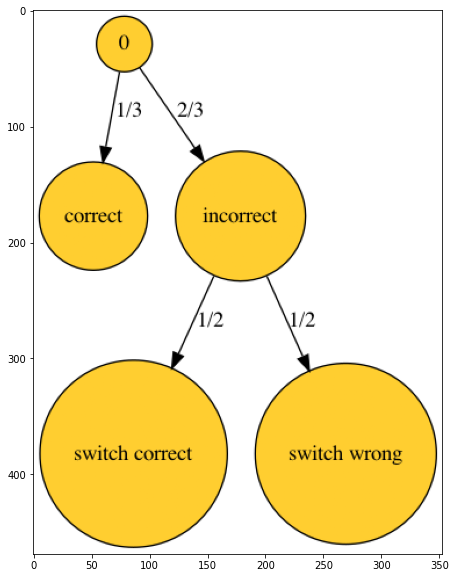

In [27]:
graph = Graph(
    {
        0: ['correct', 'incorrect'],
        'correct': [],
        'incorrect': ['switch correct', 'switch wrong'],
        'switch correct': [],
        'switch wrong': []
    },
    directed=True,
    edges= {
        '0correct': '1/3',
        '0incorrect': '2/3',
        'incorrectswitch correct': '1/2',
        'incorrectswitch wrong': '1/2'
    }
)
graph.plot(output_path='graph.png', orientation='TB')
img = mpimg.imread('graph.png')
plt.figure(figsize=(20,10))
plt.imshow(img)

### Conditional Probabilities Are Tricky

1. It will take time to build intuition for conditional probabilities.
2. When in doubt, you can always go back to the definitions.

## Continuous Random Variable

1. Previously, we worked with discrete random variables.
2. Now we will look at continuous random variables.
3. Continuous random variables are needed to model real numbers and Eucliean space.
4. The technical machinery required for a uniform treatment of discrete and continuous random variables is **measure theory**.
5. We will stick with the applied side in this class.

### Cumulative Distribution Function

1. Unlike the discrete case where we can reason about the probability of a specific outcome, we cannot do that in the continuous case.
2. Instead, we can only reason about the probability of a continuum range of events.
3. This idea is captured with the idea of a **cumulative distribution function** or CDF.

#### Definition

The CDF $F_X$ of a random variable $X$ is

$$
F_X(x) = Pr(X \leq x)
$$

#### Example: Uniform CDF

Let a random variable $X$ take on values in the interval $(a, b)$ uniformly at random. Then
$$
F_X(x) = 
\begin{cases}
0 & \mbox{$x \leq a$} \\
\frac{x - a}{b - a} & \mbox{$a < x < b$} \\
1 & \mbox{$x \geq b$}
\end{cases}
$$

In [28]:
def uniform_cdf(a, b, x):
    if x <= a:
        return 0
    elif x > a and x <= b:
        return (x - a) / (b - a)
    else:
        return 1

Text(0.5, 1.0, 'Uniform CDF')

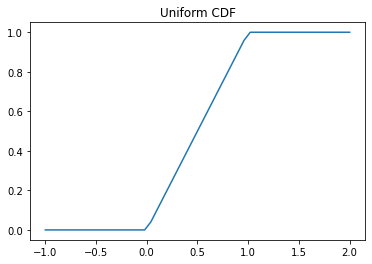

In [29]:
xs = np.linspace(-1, 2)
ys = [uniform_cdf(0, 1, x) for x in xs]
plt.plot(xs, ys)
plt.title('Uniform CDF')

### Probability of Landing in an Interval for a Uniform

The probability of landing in the interval $(0.0, 0.5)$ is
\begin{align*}
Pr(X \in (0.0, 0.5)) & = F_X(0.5) - F_X(0.0) \\
& = 0.5
\end{align*}

### Probability of Landing in an Interval for a Uniform: Continued

In fact, the probability of landing in the interval $(x, y)$ when $(x, y) \subseteq (a, b)$ is
\begin{align*}
Pr(X \in (x, y)) & = F_X(y) - F_X(x) \\
& = y - x \tag{length of interval (x, y)}
\end{align*}

### Probability Density Function

1. The **probability density function** or pdf is the derivative of the CDF.
$$
p_X(x) = \frac{d}{dx}F_X(x)
$$
2. Not every continuous distribution has a pdf.

### Example: Uniform PDF

Let a random variable $X$ take on values in the interval $(a, b)$ uniformly at random. Then
$$
p_X(x) = 
\begin{cases}
0 & \mbox{$x \leq a$} \\
\frac{1}{b - a} & \mbox{$a < x < b$} \\
0 & \mbox{$x \geq b$}
\end{cases}
$$

In [30]:
# Coding the pdf
def uniform_pdf(a, b, x):
    if x <= a:
        return 0
    elif x > a and x <= b:
        return 1 / (b - a)
    else:
        return 0

Text(0.5, 1.0, 'Uniform PDF')

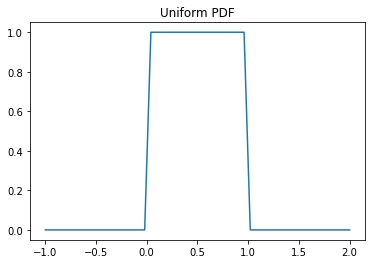

In [31]:
# Plotting the pdf
xs = np.linspace(-1, 2)
ys = [uniform_pdf(0, 1, x) for x in xs]
plt.plot(xs, ys)
plt.title('Uniform PDF')

#### Warning

1. The pdf does not give the probability of that event!
2. For example, the $p_X(.5) = 1$ does not not mean that the probability of .5 is $1$.
3. The cdf gives the probability of any interval.
4. Indeed, the probability of any single point is 0!

### Continuous Distributions: Computationally

Just like discrete distributions, we have continuous distributions.

(array([ 95., 102.,  99.,  97.,  94., 110.,  84., 110., 113.,  96.]),
 array([0.00156661, 0.1014064 , 0.20124619, 0.30108599, 0.40092578,
        0.50076558, 0.60060537, 0.70044517, 0.80028496, 0.90012475,
        0.99996455]),
 <BarContainer object of 10 artists>)

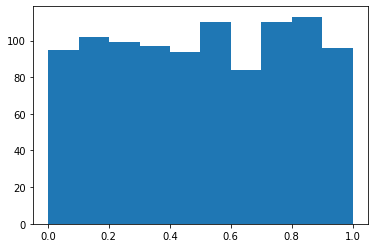

In [32]:
uniform = sp.stats.uniform(0, 1)
Xs = uniform.rvs(size=1000)
plt.hist(Xs)

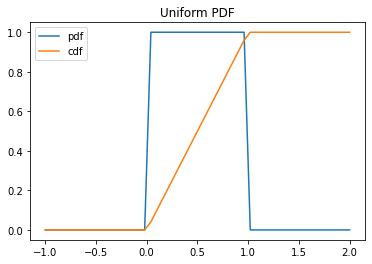

In [33]:
xs = np.linspace(-1, 2)
ys = [uniform.pdf(x) for x in xs]
cdfs = [uniform.cdf(x) for x in xs]
plt.plot(xs, ys, label='pdf')
plt.plot(xs, cdfs, label='cdf')
plt.title('Uniform PDF')
plt.legend()

### Normal Distribution

The famous Normal distribution or Gaussian distribution.

$$
X \sim \mathcal{N}(\mu, \sigma^2)
$$

means thats $X$ is a random variable with normal distribution with mean $\mu$ and scale $\sigma$.

(array([  7.,  23.,  66., 155., 258., 238., 149.,  85.,  15.,   4.]),
 array([-3.3997052 , -2.72046868, -2.04123216, -1.36199564, -0.68275912,
        -0.0035226 ,  0.67571392,  1.35495044,  2.03418696,  2.71342348,
         3.39265999]),
 <BarContainer object of 10 artists>)

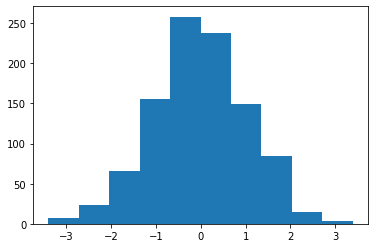

In [34]:
normal = sp.stats.norm(loc=0.0, scale=1.0)
Xs = normal.rvs(size=1000)
plt.hist(Xs)

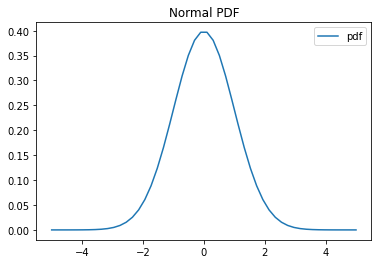

In [35]:
xs = np.linspace(-5, 5)
ys = [normal.pdf(x) for x in xs]
plt.plot(xs, ys, label='pdf')
plt.title('Normal PDF')
plt.legend()

### Normal PDF

1. $\mu$ is called the mean or location.
2. $\sigma$ is called the scale ($\sigma^2$ is the variance).

$$
p_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{(x - \mu)^2/(2\sigma^2)}
$$

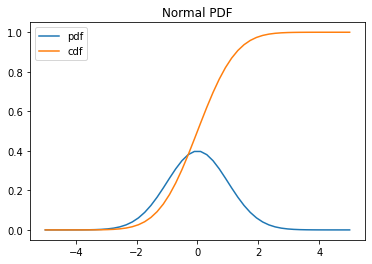

In [36]:
xs = np.linspace(-5, 5)
ys = [normal.pdf(x) for x in xs]
zs = [normal.cdf(x) for x in xs]
plt.plot(xs, ys, label='pdf')
plt.plot(xs, zs, label='cdf')
plt.title('Normal PDF')
plt.legend()

### Normal CDF

\begin{align*}
F_X(c) & = \int_{-\infty}^c p_X(x) dx \\
       & = \int_{-\infty}^c \frac{1}{\sqrt{2\pi\sigma^2}}e^{(x - \mu)^2/(2\sigma^2)} dx 
\end{align*}

1. The normal CDF does not have a closed form solution meaning that there is no nice formula for the CDF.

### Summary

1. You can always look up the pdf/cdf of many distributions.
2. The Normal distribution is very important.

## Expectation of a Continuous Random Variable

1. The continuous analog of summation is integration.
2. Thus the expectation of a continuous random variable with pdf $p_X$ is defined as
$$
\mathbb{E}(X) = \int_{-\infty}^\infty x p_X(x) dx \,.
$$

### Joint Density

1. Like before we would like to talk about multiple continuous random variables.

2. The **joint probability density function** (when it exists) of two random variables $X$ and $Y$ is written
$$
p_{X, Y}(x, y)
$$
and has the property that
$$
\int_{\infty}^\infty \int_{\infty}^\infty p_{X, Y}(x, y) dx dy = 1 \,.
$$

3. The marginal probability density functions can be obtained by integration
    - $p_X(x) = \int_{-\infty}^{\infty} p_{X, Y}(x, y) dy$
    - $p_Y(y) = \int_{-\infty}^{\infty} p_{X, Y}(x, y) dx$

### Conditional Density

A **conditional density** is notated
$$
p_{X|Y}(x | y)
$$
and is a probability density function of X for a fixed value of $Y$.

### Bayes Rule: Continuous Version

Suppose $X$ and $Y$ are continuous random variables with joint density $p_{X, Y}(x, y)$.
1. Then
$$
p_{X, Y}(x, y) = p_{X|Y}(x | y) p(y)
$$
when $p_{X|Y}(x | y)$ exists.
2. Then
$$
p_{X, Y}(x, y) = p_{Y|X}(y | x) p(x)
$$
when $p_{Y|X}(y | x)$ exists.

### Example: Tic-Tac-Toe Board

Suppose we have a uniform distribution over a unit square, i.e.,
$$
p_{X, Y}(x, y) = \begin{cases}
1 & \mbox{$(x, y) \in (0, 1) \times (0, 1)$} \\
0 & \mbox{otherwise}
\end{cases}
$$

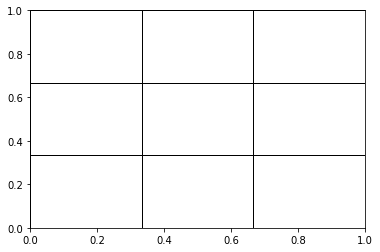

In [37]:
def draw_tictactoe(scale=1./3.):
    from matplotlib.patches import Rectangle

    fig, ax = plt.subplots()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    for i in range(0, 3):
        for j in range(0, 3):
            ax.add_patch(Rectangle((i*scale, j*scale), scale, scale, fill=False))
    return ax

ax = draw_tictactoe()

### Probability of middle square using joint density

\begin{align*}
Pr((X, Y) \in \text{middle square}) & = \int_{1/3}^{2/3} \int_{1/3}^{2/3} p_{X, Y}(x, y) dx dy \\
& = \int_{1/3}^{2/3} \int_{1/3}^{2/3} dx dy \\
& = \int_{1/3}^{2/3} x|_{1/3}^{2/3} dy \\
& = \int_{1/3}^{2/3} 1/3 dy \\
& = 1/3 \int_{1/3}^{2/3} dy \\
& = 1/3 (y |_{1/3}^{2/3}) \\
& = 1/9
\end{align*}

### Pictoral check

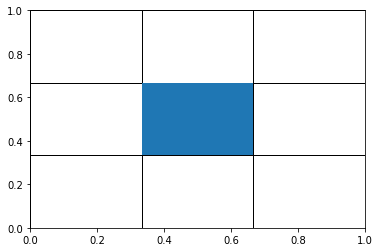

In [40]:
from matplotlib.patches import Rectangle
ax = draw_tictactoe()
scale = 1./3.
ax.add_patch(Rectangle((1./3., 1./3.), scale, scale, fill=True))

1. Recall that we have a uniform distribution over the tic-tac-toe board.
2. There are 9 squares.
3. The probability of 1 square is $1/9$

# Revisiting Linear Regression

- Ok we saw a bunch of probability and calculus.
- How does this relate to the problem of regression?

## Probabilistic Model

1. Let $\theta_d$ for $1 \leq d \leq D + 1$ be the weights that we learn in a linear regression.
2. Suppose we have a dataset of $N$ points $(x^{i}, y^{i})_{1 \leq i \leq N}$.
3. Finally suppose we have a model
$$
Y^{i} | X^{i} \sim \mathcal{N}((\theta_1 \dots \theta_{D+1}) \cdot (x_1^i \dots x_D^i 1), \sigma^2) \,.
$$
where $X^{i}$ is the random variable corresponding to the inputs, $Y^{i}$ is the random variable corresponding to the outputs, and $Y^{i} | X^{i}$ is the random variable of $Y^{i}$ given that $X^{i}$ is taking on a certain value with the appropriate distribution.
4. Then the choice of $\theta$ that maximizes the conditional density
$$
p(y | x ; \theta) = \Pi_{i=1}^N p(y^{i} | x^{i} ; \theta)
$$
gives the same solution as the linear algebra solution from before.

### Let's unpack this with an example

Text(0.5, 1.0, 'Example dataset')

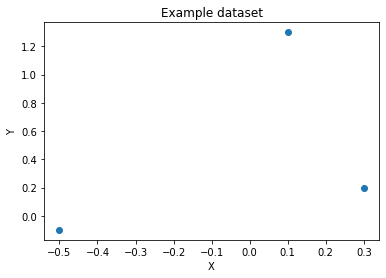

In [41]:
x1 = [0.3]                     # each point has dimension 1
x2 = [-0.5]               
x3 = [.1]                
Y = [0.2, -.1, 1.3]
X = np.array([x1, x2, x3])   # each row is one point

plt.plot(X[:,0], Y, marker='o', linestyle='none')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Example dataset')

### Construct the distribution

We need to construct
$$
\mathcal{N}((\theta_1 \dots \theta_{D+1}) \cdot (x_1^i \dots x_D^i 1), \sigma^2)
$$

In [46]:
def construct_distribution(theta, scale):
    X_p = np.concatenate([X, np.ones((3, 1))], axis=1)
    normals = [
        sp.stats.norm(loc=np.dot(theta, X_p[0]), scale=scale),
        sp.stats.norm(loc=np.dot(theta, X_p[1]), scale=scale),
        sp.stats.norm(loc=np.dot(theta, X_p[2]), scale=scale)
    ]
    return normals

### Construct the conditional density

In [47]:
theta = np.array([0.5, 0.5])

def conditional_density(theta, scale):
    normals = construct_distribution(theta, scale)
    return normals[0].pdf(Y[0]) * normals[1].pdf(Y[1]) * normals[2].pdf(Y[2])
    
conditional_density(theta, 1.0)

0.04073915541027458

### Find the theta

- We'll use a grid search where we just enumerate a grid of values.
- Later we'll learn how to use optimization techniques to better search the space.

In [48]:
thetas1 = np.linspace(0.0, 1.0)
thetas2 = np.linspace(0.0, 1.0)

# Enumerate a grid of theta1 and theta2 to find the best theta
best = 0.0
best_theta = np.zeros(2)
for theta1 in thetas1:
    for theta2 in thetas2:
        tmp = conditional_density(np.array([theta1, theta2]), 1.0) 
        if tmp > best:
            best_theta[0] = theta1
            best_theta[1] = theta2
            best = tmp
print("Best theta", best_theta, "Density", best)

Best theta [0.81632653 0.48979592] Density 0.041516358671785464


In [49]:
def linear_algebra_solve(X, Y):
    X_p = np.concatenate([X, np.ones((3, 1))], axis=1)
    return np.linalg.solve(X_p.transpose() @ X_p, X_p.transpose() @ Y)

linear_algebra_solve(X, Y)

array([0.82692308, 0.49423077])

### We got the "Same Answer"

1. The grid that we searched does not exactly contain the solution which is why the numbers don't exactly match up
2. Moreover, there are floating point issues to consider.

### Higher dimensions?

1. Yes the probabilistic version works for higher dimensions.
2. However, our searching mechanism is too slow to work for higher dimensions.

### Some Questions You May Have

$$
Y^{i} | X^{i} \sim \mathcal{N}((\theta_1 \dots \theta_{D+1}) \cdot (x_1^i \dots x_D^i 1), \sigma^2) \,.
$$

### Question 1: Why Doesn't the Scale Matter?

In [50]:
thetas1 = np.linspace(0.0, 1.0)
thetas2 = np.linspace(0.0, 1.0)

# Enumerate a grid of theta1 and theta2 to find the best theta
best = 0.0
best_theta = np.zeros(2)
for theta1 in thetas1:
    for theta2 in thetas2:
        tmp = conditional_density(np.array([theta1, theta2]), 10.0) # Changed scaled to 10
        if tmp > best:
            best_theta[0] = theta1
            best_theta[1] = theta2
            best = tmp
print("Best theta", best_theta, "Density", best)

Best theta [0.81632653 0.48979592] Density 6.322445407741327e-05


### Question 2: What if we add a distribution to theta?

1. This is known as a **Bayesian** approach.
2. This can be used to express constraints on the values of $\theta$.

### Question 3: What if we add a distribution to X?

1. This is known as **generative modeling** where we also model the distribution on $X$.

# Summary

1. We looked at univariate discrete probability.
2. We looked at multi-variate discrete probability.
3. We looked at the generalization to continuous probability.
4. We saw how linear regression could be interpreted in a probabilistic manner.